<a href="https://colab.research.google.com/github/sgangavaram/FMML2023/blob/MODULE-2/Module2_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

RS = 20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

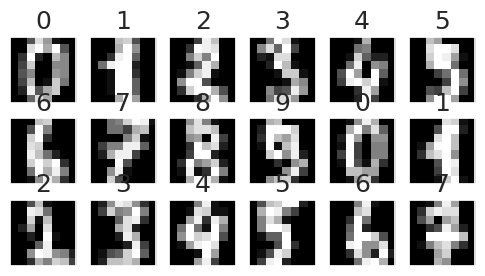

In [4]:
nrows, ncols = 3, 6
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [5]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [6]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

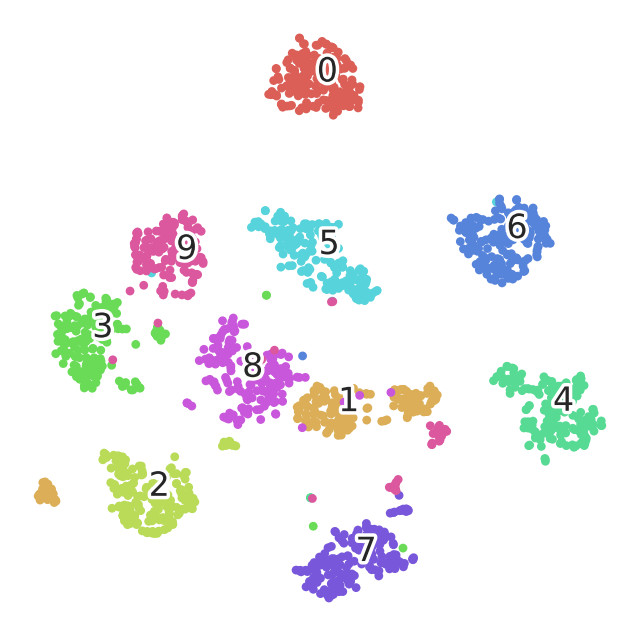

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e50c58f4be0>)

In [7]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc
scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role

---

# Changing the PERPLEXITY values

---

# With Perplexity = 5

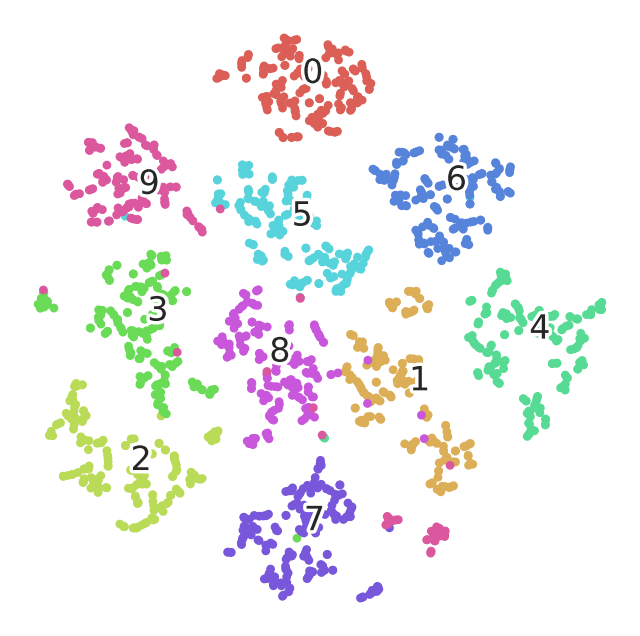

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e50c58f51e0>)

In [8]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)
scatter(digits_proj, y)

# With Perplexity= 100

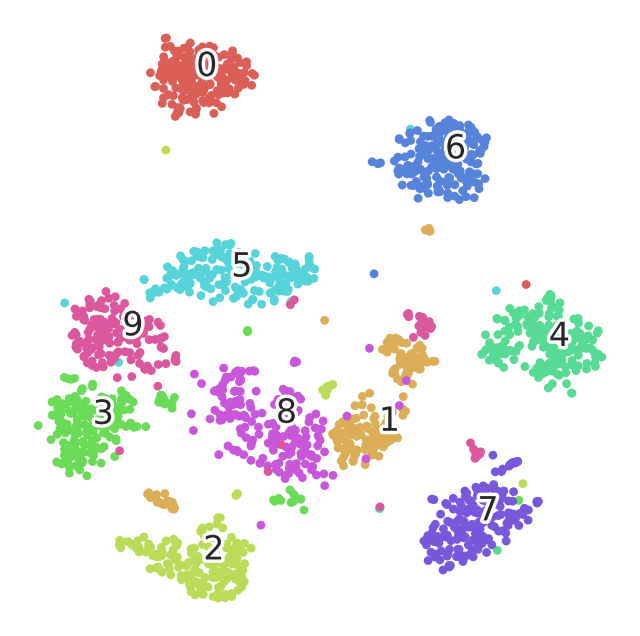

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7943eac8b2e0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

## With 250 Iterations

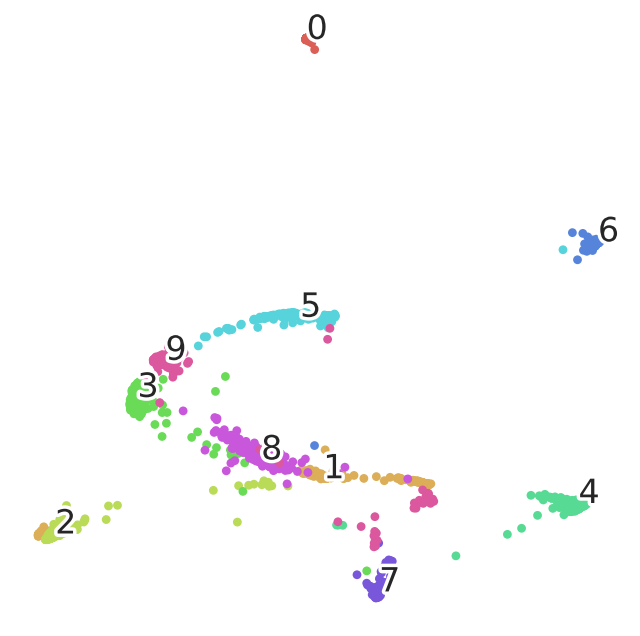

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e50c5a1ca30>)

In [9]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)
scatter(digits_proj, y)

## With 5000 iterations

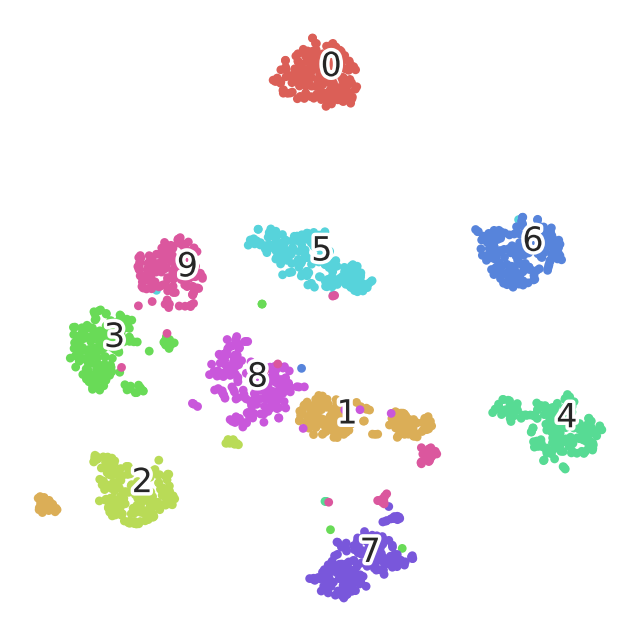

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e50c591d5a0>)

In [10]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)
scatter(digits_proj, y)

## With 1000 iterations

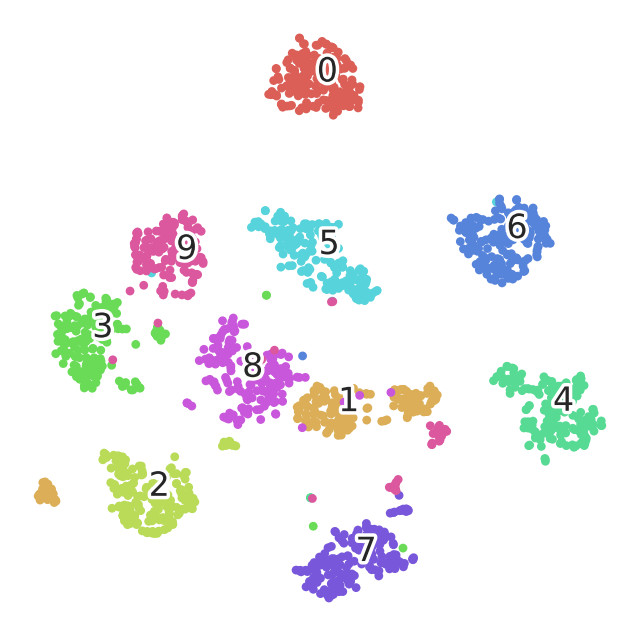

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e50c5899030>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=1000).fit_transform(X)
scatter(digits_proj, y)

## Changing the method to EXACT

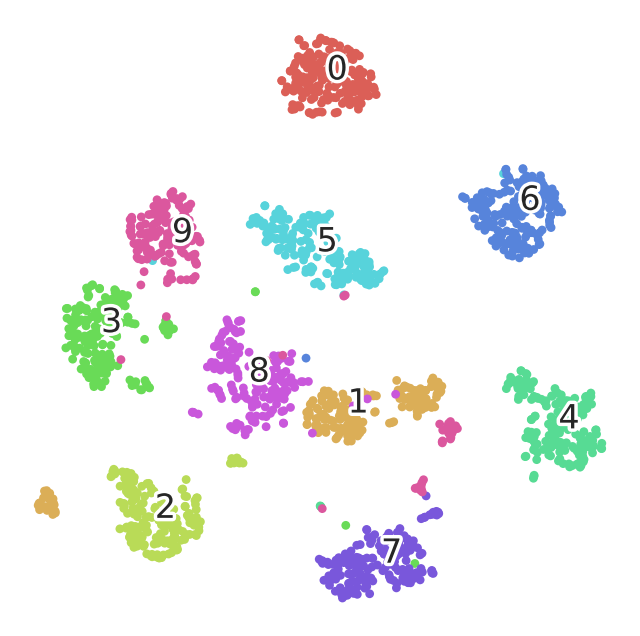

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e50c3348b20>)

In [12]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)
scatter(digits_proj, y)

## EXERCISE

---


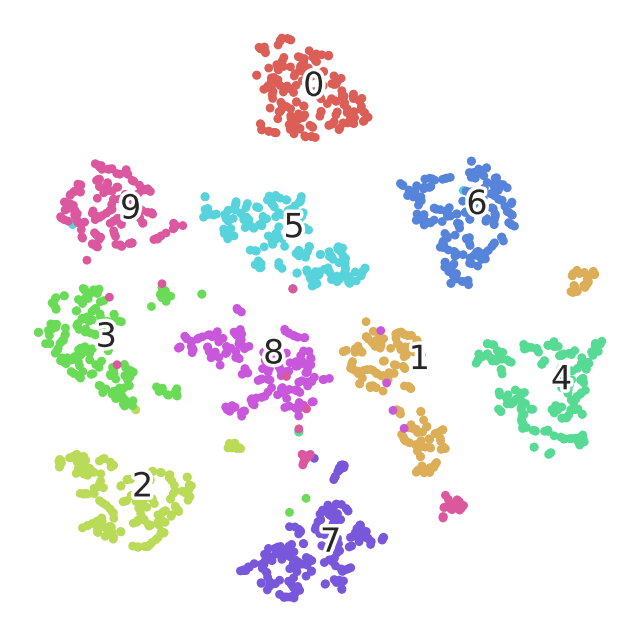

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7e50bd0e6ad0>)

In [16]:
perplexity_value = 10
number_iterations = 800
method = "barnes_hut"
digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)



---

## QUESTION:

1. **Can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?**

  PCA and t-SNE are both dimensionality reduction techniques. PCA is a linear technique that is best suited for data with a linear structure, while t-SNE is a nonlinear technique that is better suited for data with a complex, nonlinear structure.
  
  PCA finds the principal components of the data, which can be used to reduce the dimensionality of the data while preserving the most important features. t-SNE is able to capture the underlying structure of complex, nonlinear data by modeling the local similarities between points in the high-dimensional space.t-SNE is particularly effective at preserving the local structure of the data, which makes it useful for visualizing clusters and identifying patterns in the data.
  
  The choice between the two techniques depends on the structure of the data and the specific problem.


2. **Which of the two algorithms is linear and which one is non-linear?**

  PCA is a linear dimensionality reduction technique that is best suited for data with a linear structure.
  
  t-SNE is a nonlinear dimensionality reduction technique that is better suited for data with a complex, nonlinear structure.

3. **How does the non-linearity in one of these two algorithms help in capturing certain data sets?**

  The non-linearity in t-SNE allows it to capture the underlying structure of complex, nonlinear data by modeling the local similarities between points in the high-dimensional space. This makes t-SNE particularly effective at preserving the local structure of the data, which is useful for visualizing clusters and identifying patterns in the data.

4. **PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?**

 In contrast to PCA, t-SNE is known to preserve the local structure of the data, which means that points that are close together in the higher dimension will also be close together in the lower dimension. It tries to preserve local neighbourhood.

5. **Can you comment on which one of the two is computationally more expensive?**

  PCA is computationally less expensive compared to t-SNE, especially in case of huge datasets with more number of points.